In [10]:
# Import necessary modules
from openfermion import MolecularData
from openfermionpyscf import run_pyscf
from openfermion.transforms import jordan_wigner
from openfermion.linalg import get_sparse_operator

# Define the geometry of the H2 molecule
geometry = [('H', (0, 0, 0)), ('H', (0, 0, 0.74))]  # 0.74 Å is a typical bond length
basis = 'sto-3g'  # Standard basis set
multiplicity = 1  # Singlet state
charge = 0  # Neutral molecule

# Create a MolecularData object
molecule = MolecularData(geometry, basis, multiplicity, charge)

# Run a classical Hartree-Fock calculation using PySCF
molecule = run_pyscf(molecule)

# Get the molecular Hamiltonian after calculation
molecular_hamiltonian = molecule.get_molecular_hamiltonian()

# Transform the Hamiltonian to qubit space using the Jordan-Wigner transformation
qubit_hamiltonian = jordan_wigner(molecular_hamiltonian)

# Print the qubit Hamiltonian
print("Qubit Hamiltonian for H2:", qubit_hamiltonian)


Qubit Hamiltonian for H2: -0.09706626816763095 [] +
-0.045302615503799264 [X0 X1 Y2 Y3] +
0.045302615503799264 [X0 Y1 Y2 X3] +
0.045302615503799264 [Y0 X1 X2 Y3] +
-0.045302615503799264 [Y0 Y1 X2 X3] +
0.17141282644776903 [Z0] +
0.16868898170361207 [Z0 Z1] +
0.12062523483390411 [Z0 Z2] +
0.16592785033770338 [Z0 Z3] +
0.1714128264477691 [Z1] +
0.16592785033770338 [Z1 Z2] +
0.12062523483390411 [Z1 Z3] +
-0.22343153690813433 [Z2] +
0.17441287612261572 [Z2 Z3] +
-0.22343153690813433 [Z3]


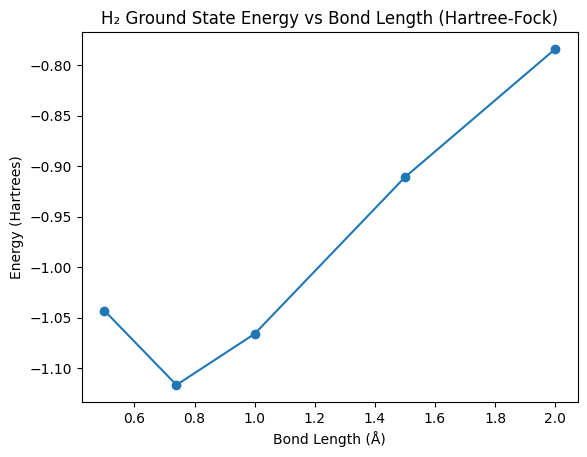

In [15]:
# Import necessary modules
from openfermion import MolecularData
from openfermionpyscf import run_pyscf
import matplotlib.pyplot as plt

# Define basis and other parameters
basis = 'sto-3g'  # Standard basis set
multiplicity = 1  # Singlet state
charge = 0  # Neutral molecule

# List of bond lengths to calculate energies for
bond_lengths = [0.5, 0.74, 1.0, 1.5, 2.0]  # Example bond lengths in Ångstroms
energies = []

for bond_length in bond_lengths:
    # Define the geometry for each bond length
    geometry = [('H', (0, 0, 0)), ('H', (0, 0, bond_length))]
    
    # Create a MolecularData object for each geometry
    molecule = MolecularData(geometry, basis, multiplicity, charge)
    
    # Run Hartree-Fock calculation using PySCF
    molecule = run_pyscf(molecule)
    
    # Get the Hartree-Fock energy
    energy = molecule.hf_energy
    energies.append(energy)

# Plotting the results
plt.plot(bond_lengths, energies, marker='o')
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartrees)')
plt.title('H₂ Ground State Energy vs Bond Length (Hartree-Fock)')
plt.show()
